In [1]:
import scipy.io
import numpy as np
from scipy.io import loadmat

# Laden van het bestand glucosedata.mat met functie loadmat
mat_contents = 

# Laad de variabele glucodat
glucodat = 

SyntaxError: invalid syntax (2457528420.py, line 6)

In [2]:
import scipy.io
import numpy as np
from scipy.io import loadmat

# Laden van het bestand glucosedata.mat met functie loadmat
mat_contents = loadmat('C:/Users/veerl/Documents/Inleiding Programmeren/tm-introduction-programming/data/glucosedata.mat')

# De variabele glucodat 
glucodat = mat_contents['glucodat']

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/veerl/Documents/Inleiding Programmeren/tm-introduction-programming/data/glucosedata.mat'

In [3]:
# Your code...

In [4]:
# Type van de variabele glucodat
print(type(glucodat)) 

# Displaying the fields of glucodat
IDs = glucodat.dtype.names

# Het aantal patiënten is gelijk aan het aantal velden (fields) in glucodat
aantal_patienten = len(IDs)
print(f"Het totaal aantal patiënten is: {aantal_patienten}") # In totaal 131 patiënten

NameError: name 'glucodat' is not defined

In [5]:
# Your code...

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Definieer de parameters voor de schatting van de gemiddelde bloedglucoseconcentratie
a = 12.71  # mmol/mol
b = 4.70587  # L/mol

# Kies drie willekeurige patiënten
selected_patients=random.sample(IDs,3)

# Loop door de geselecteerde patiënten
plt.figure(figsize=(15, 5 * len(selected_patients)))

for i, patient_id in enumerate(selected_patients, start=1):
    # Haal de CGM, BGM en HbA1c data op voor de huidige patiënt
    CGM_time = glucodat[patient_id][0, 0]['CGM'][0, 0]['time'][0, 0]
    CGM_data = glucodat[patient_id][0, 0]['CGM'][0, 0]['data'][0, 0]

    BGM_time = glucodat[patient_id][0, 0]['BGM'][0, 0]['time'][0, 0]
    BGM_data = glucodat[patient_id][0, 0]['BGM'][0, 0]['data'][0, 0]

    HbA1c_time = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['time'][0, 0]
    HbA1c_data = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['data'][0, 0]

    # Plot alle waarden van de huidige patiënt in één subplot
    plt.subplot(len(selected_patients), 1, i)

    # Plot de CGM van de patiënt als functie van tijd
    plt.plot(CGM_time, CGM_data, label='CGM')
    
    # Plot de BGM van de patiënt als functie van tijd (gebruik stem)
    #plt.stem(bgm_time, bgm_data, label='BGM',linefmt ='pink',markerfmt ='D')
    plt.plot(BGM_time, BGM_data, label='BGM')
    
    # Bereken de geschatte gemiddelde bloedglucoseconcentratie g
    g_estimate = HbA1c_data - a / b

    # Plot de geschatte gemiddelde bloedglucoseconcentratie
    plt.plot(HbA1c_time[0], g_estimate[0], label='Gemiddelde glucoseconcentratie')

    # Zet labels en titel
    plt.title('Patient {}'.format(patient_id))
    plt.xlabel('Tijd(dagen)')
    plt.ylabel('Concentratie (mmol/L)')
    plt.legend()

plt.tight_layout()
plt.show()





NameError: name 'IDs' is not defined

In [7]:
# Your code...

In [8]:
def Gluc_param(CGM_signaal):
    # Constants voor de eA1c berekening
    a = 12.71
    b = 4.70587

    # Bereken eA1c
    eA1c = a + b * CGM_signaal.mean()

    # Bereken TAR, TIR, TBR percentages # KLOPT DIT OF MOET HET DELEN DOOR HET TOTAAL AANTAL SIGNALEN ZIJN
    tar_percentage = (CGM_signaal > 10.0).mean() * 100
    tir_percentage = ((CGM_signaal >= 3.9) & (CGM_signaal <= 10.0)).mean() * 100
    tbr_percentage = (CGM_signaal < 3.9).mean() * 100

    return eA1c, tar_percentage, tir_percentage, tbr_percentage

# Voorbeeldgebruik:
# Selecteer 1 patiënt
select_ID='ID_293'
CGM_signaal = glucodat[select_ID][0, 0]['CGM'][0, 0]['data'][0, 0]

# Roep de functie aan
eA1c, tar, tir, tbr = Gluc_param(CGM_signaal)

# Toon de resultaten
print(f"eA1c: {eA1c} mmol/mol")
print(f"TAR: {tar}%")
print(f"TIR: {tir}%")
print(f"TBR: {tbr}%")

NameError: name 'glucodat' is not defined

In [9]:
# Your code...

In [10]:
# 1: Sla alle klinische parametrs op in één matrix
Gluc_parameters=np.zeros((4,len(IDs)))
patient_groep = np.zeros(len(IDs))

for i, patient_id in enumerate(IDs):
    # Hiermee kan je de data van de ... 
    CGM_signaal = glucodat[patient_id][0,0]['CGM'][0,0]['data'][0,0]
    eA1c, tar, tir, tbr = Gluc_param(CGM_signaal)
    # Sla de parameters op in de matrix
    Gluc_parameters[:, i] = [eA1c, tar, tir, tbr]

# 2: Maak een vector met verschillende nummers voor de verschillende groepen
# Onderverdeel in patiëntgroepen op basis van eA1c
patient_groepen = np.where(Gluc_parameters[0, :] <= 53, 0, np.where(Gluc_parameters[0, :] < 63, 2, 1)) # Let op dat 
#je de middelste groep niet definieërd maar wel op plek 1 in de matrix zet!!

# 3: Bereken de gemiddelde TBR, TIR en TAr voor de verschillende groepen
# Lijsten voor het opslaan van gemiddelde waarden per groep
# bepaal de posities dat patient_groepen is gelijk aan groep 0
# Lijst met posities van elke patiëntgroep
posities_groepen = [np.where(patient_groepen == i)[0] for i in range(3)]

# Bereken gemiddelde waarden per groep
gemiddelde_tar = [np.mean(Gluc_parameters[1,posities]) for posities in posities_groepen]
gemiddelde_tir = [np.mean(Gluc_parameters[2,posities]) for posities in posities_groepen]
gemiddelde_tbr = [np.mean(Gluc_parameters[3,posities]) for posities in posities_groepen]

# Toon de resultaten
print("Gemiddelde TBR, TIR en TAR per patiëntgroep:")
print("Patiëntgroep 0 (Laag):")
print(f"TBR: {gemiddelde_tbr[0]}, TIR: {gemiddelde_tir[0]}, TAR: {gemiddelde_tar[0]}")
print("Patiëntgroep 1 (Midden):")
print(f"TBR: {gemiddelde_tbr[1]}, TIR: {gemiddelde_tir[1]}, TAR: {gemiddelde_tar[1]}")
print("Patiëntgroep 2 (Hoog):")
print(f"TBR: {gemiddelde_tbr[2]}, TIR: {gemiddelde_tir[2]}, TAR: {gemiddelde_tar[2]}")

# 4: Maak een bar-graph

# Patiëntgroepnamen
groepen = ['Laag', 'Midden', 'Hoog']

# Breedte van de bars
bar_breedte = 0.35

# Positie op de x-as voor elke groep
posities = np.arange(len(groepen))

# Maak de stacked bar chart
fig, ax = plt.subplots()
bar_tbr = ax.bar(posities - bar_breedte/2, gemiddelde_tbr, bar_breedte, label='TBR')
bar_tir = ax.bar(posities - bar_breedte/2, gemiddelde_tir, bar_breedte, label='TIR', bottom=gemiddelde_tbr)
bar_tar = ax.bar(posities - bar_breedte/2, gemiddelde_tar, bar_breedte, label='TAR', bottom=np.array(gemiddelde_tbr) + np.array(gemiddelde_tir))

# Voeg labels, titels en legenda toe
ax.set_xlabel('Patiëntgroepen')
ax.set_ylabel('Percentage')
ax.set_title('Gemiddelde TBR, TIR en TAR per patiëntgroep')
ax.set_xticks(posities)
ax.set_xticklabels(groepen)
ax.legend()

# Toon de plot
plt.show()

NameError: name 'IDs' is not defined

In [11]:

def movingav(x, M):
    """
    x: input vector
    M: orde van het filter

    Returns:
    y: output vector na toepassing van moving average filter
    """
    # Controleer of de orde M geldig is
    if M < 0:
        raise ValueError('Orde M moet een niet-negatief geheel getal zijn.')

    # Bepaal de coëfficiënten van het moving average filter
    b = np.ones(M + 1) / (M + 1)

    # Pas het filter toe op de inputvector x
    y = np.convolve(x, b, mode='same')

    return y

In [12]:
# Your code... + uitleg

[0.33333333 0.66666667 1.         1.         1.         0.66666667]


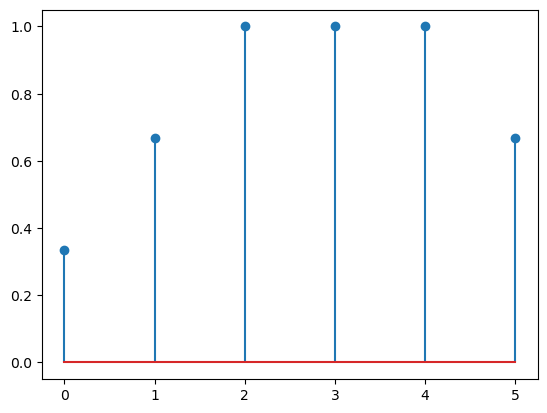

In [13]:
# Controle code
x = np.array([0, 1, 1, 1, 1, 1])
t = np.array([0, 1, 2, 3, 4, 5])
M = 2
y = movingav(x, M)
print(y)

plt.stem(t,y) # ook wel "lollipop plot" genoemd
plt.show()

In [14]:
# Your code...

In [15]:
# Kies drie willekeurige patiënten
selected_patients=random.sample(IDs,3)

# Bepaal filter orde
M=2

# Loop door de geselecteerde patiënten
plt.figure(figsize=(15, 5 * len(selected_patients)))

for i, patient_id in enumerate(selected_patients, start=1):
    # Haal de CGM, BGM en HbA1c data op voor de huidige patiënt
    CGM_time = glucodat[patient_id][0, 0]['CGM'][0, 0]['time'][0, 0]
    CGM_data = glucodat[patient_id][0, 0]['CGM'][0, 0]['data'][0, 0]
    
    flattened_cgm_data = CGM_data.flatten()
    CGM_filt = movingav(flattened_cgm_data, M)

    HbA1c_time = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['time'][0, 0]
    HbA1c_data = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['data'][0, 0]

    # Plot alle waarden van de huidige patiënt in één subplot
    plt.subplot(len(selected_patients), 1, i)

    # Plot de CGM van de patiënt als functie van tijd
    plt.plot(CGM_time, CGM_data, label='CGM')
    
    # Plot de BGM van de patiënt als functie van tijd (gebruik stem)
    plt.plot(CGM_time, CGM_filt, label='Gefilterd CGM')
    
    # Bereken de geschatte gemiddelde bloedglucoseconcentratie g
    g_estimate = HbA1c_data - a / b

    # Plot de geschatte gemiddelde bloedglucoseconcentratie
    plt.plot(HbA1c_time[0], g_estimate[0], label='Gemiddelde glucoseconcentratie')

    # Zet labels en titel
    plt.title('Patient {}'.format(patient_id))
    plt.xlabel('Tijd(dagen)')
    plt.ylabel('Concentratie (mmol/L)')
    plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'IDs' is not defined

In [16]:
# Your code... + uitleg

In [17]:
# Selecteer één willekeurige patiënt 
patient_id='ID_293'

# Gebruik meerdere ordes
dag_samp= round(24*60*0.2) # (uren*minuten*1/samp_freq)
week_samp= round(7*24*60*0.2) # (dagen*uren*minuten*1/samp_freq)
M_select=np.array([2,dag_samp,week_samp])

# Loop door de geselecteerde patiënten
plt.figure(figsize=(15, 5 * len(M_select)))

for i, M in enumerate(M_select, start=1):
    # Haal de CGM, BGM en HbA1c data op voor de huidige patiënt
    CGM_time = glucodat[patient_id][0, 0]['CGM'][0, 0]['time'][0, 0]
    CGM_data = glucodat[patient_id][0, 0]['CGM'][0, 0]['data'][0, 0]
    
    flattened_cgm_data = CGM_data.flatten()
    CGM_filt = movingav(flattened_cgm_data, M)

    HbA1c_time = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['time'][0, 0]
    HbA1c_data = glucodat[patient_id][0, 0]['HbA1c'][0, 0]['data'][0, 0]

    # Plot alle waarden van de huidige patiënt in één subplot
    plt.subplot(len(M_select), 1, i)

    # Plot de CGM van de patiënt als functie van tijd
    plt.plot(CGM_time, CGM_data, label='CGM')
    
    # Plot de BGM van de patiënt als functie van tijd (gebruik stem)
    plt.plot(CGM_time, CGM_filt, label='Gefilterd CGM')
    
    # Bereken de geschatte gemiddelde bloedglucoseconcentratie g
    g_estimate = HbA1c_data - a / b

    # Plot de geschatte gemiddelde bloedglucoseconcentratie
    plt.plot(HbA1c_time[0], g_estimate[0], label='Gemiddelde glucoseconcentratie')

    # Zet labels en titel
    plt.title('Patient {}'.format(patient_id))
    plt.xlabel('Tijd(dagen)')
    plt.ylabel('Concentratie (mmol/L)')
    plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'glucodat' is not defined

<Figure size 1500x1500 with 0 Axes>